### paper plots

pretty plots for final paper

In [1]:
import autoencodeSVJ.utils as utils
import autoencodeSVJ.evaluate as ev
%run autoencode/module/autoencodeSVJ/evaluate.py

Using TensorFlow backend.


In [5]:
utils.summary().cfilter(['filename', 'mae_auc', 'hlf_to_drop', 'end_time', 'norm_type']).sort_values('mae_auc')[::-1].head(10)

,end_time,filename,hlf_to_drop,mae_auc,norm_type
114,2019-08-09 13:30:13.843092,hlf_eflow3_10_v6,"[Energy, Flavor]",0.904568,MinMaxScaler
107,2019-08-09 12:46:10.082595,hlf_eflow3_10_v4,"[Energy, Flavor]",0.904568,MinMaxScaler
108,2019-08-09 12:51:25.176305,hlf_eflow4_12_v1,"[Energy, Flavor]",0.901751,MinMaxScaler
101,2019-08-09 11:45:12.506992,hlf_eflow3_8_v19,"[Energy, Flavor]",0.895509,MinMaxScaler
79,2019-08-09 06:38:48.664521,hlf_eflow3_20_v39,"[Energy, Flavor]",0.889205,MinMaxScaler
75,2019-08-09 06:20:53.534471,hlf_eflow3_20_v35,"[Energy, Flavor]",0.889205,MinMaxScaler
76,2019-08-09 06:25:09.736023,hlf_eflow3_20_v36,"[Energy, Flavor]",0.889205,MinMaxScaler
77,2019-08-09 06:29:35.556669,hlf_eflow3_20_v37,"[Energy, Flavor]",0.889205,MinMaxScaler
78,2019-08-09 06:34:13.934080,hlf_eflow3_20_v38,"[Energy, Flavor]",0.889205,MinMaxScaler
71,2019-08-09 06:03:47.604549,hlf_eflow3_20_v31,"[Energy, Flavor]",0.889205,MinMaxScaler


In [25]:
e = ae_evaluation("hlf_eflow3_10_v6")

found 1 matches with search '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/autoencode/data/summary/hlf_eflow3_10_v6.summary'
train_shell :: using saved model


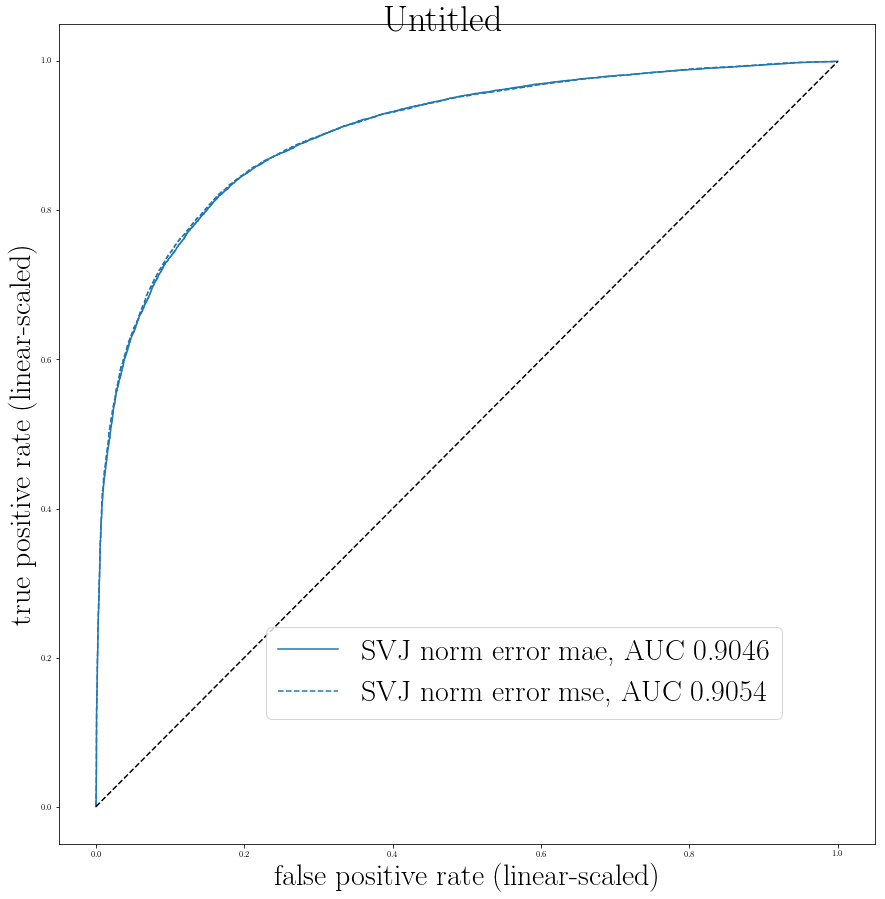

In [82]:
e.roc(figsize=13)

In [28]:
import glob
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
matplotlib.rcParams.update({'font.size': 16})
from collections import OrderedDict as odict

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def plotdata(elt_dicts, filter=["*"], drop=[], names="*"):
    if isinstance(elt_dicts, odict):
        elt_dicts = {'NONE': elt_dicts}
    
    modified = {}
    elt_dict = {}
    for k,v in elt_dicts.items():
        d = v.copy()
        for sub_k in v:
            if k == 'NONE':
                key = sub_k
                d[key] = v[sub_k]
            else:
                key = (sub_k + ' ' + k).strip()
                d[key] = v[sub_k]
                del d[sub_k]
                if sub_k not in modified:
                    modified[sub_k] = []
                modified[sub_k].append(key)

        elt_dict.update(d)
        
    names = utils.parse_globlist(match_list=elt_dict.keys(), glob_list=names)
    
    for name in names.copy():
        if name in modified:
            for subn in modified[name]:
                names.add(subn)
    
    nameset = names.copy()
    names = []
    
    for elt in order:
        add = [] 
        for name in nameset:
            if name.startswith(elt):
                add.append(name)
        names += sorted(add)

    keep = {}
    
    for name in names:
        keep[name] = elt_dict[name].cdrop(drop).cfilter(filter)
    
    
    assert len(keep) > 0
    ref = keep.values()[0]
    cols = []
    
    for c in ref.columns:
        if all([c in v for v in keep.values()]):
            cols.append(c)
#     cols = set.intersection(*[set(v.columns) for v in keep.values()])
    
    ret = odict()
    for c in list(cols):
        ret[c] = odict()
        for name in names:
            ret[c][name] = keep[name][c]
        
    return ret


#     plt.legend(fontsize=20)   
styles = {
    'SVJ': {
        'facecolor': 'm',
        'histtype': 'step',
        'fill': True,
        'edgecolor': 'k',
        'label': r'SVJ',
        'alpha': 0.4,
#         'hatch': '/'
    },
    'qcd': {
        'facecolor': 'y',
        'histtype': 'step',
        'fill': True,
        'edgecolor': 'k',
        'label': r'QCD',
        'alpha': 0.4

    },
    'ttbar': {
        'facecolor': 'C0',
        'label': r'$t\bar{t}$',
        'edgecolor': 'w',
        'hatch': '//',
        'fill': True,
        'histtype': 'step',
        'alpha': 0.4

    }
}

order = [
    'ttbar',
    'SVJ',
    'qcd'
]


var_styles = {
    'ChargedFraction': {
        'xlabel': r'Charged Fraction',
        'fontsize': 20,
    },
    'Pt': {
        'xlabel': r'$\displaystyle p_{T}$',
        'fontsize': 20,
    },
    'Eta': {
        'xlabel': r'$\displaystyle \eta$',
        'fontsize': 20,
#         'range': (0., 0.7),
    },
    'Phi': {
        'xlabel': r'$\displaystyle \phi$',
        'fontsize': 20,
#         'range': (0., 0.7),
    },
    'M': {
        'xlabel': 'Mass',
        'fontsize': 20,
    },
    'mae': {
        'xlabel': 'Reconstruction Error (MAE)',
        'fontsize': 30,
    },
    'PTD': {
        'xlabel': 'PTD',
        'fontsize': 20,
    },
    'Axis2': {
        'xlabel': 'Axis_2',
        'fontsize': 20,
    }
}

# more than needed
for i in range(100):
    var_styles['eflow {}'.format(i)] = {}
    var_styles['eflow {}'.format(i)]['xlabel'] = "Variable {}".format(i)
    var_styles['eflow {}'.format(i)]['fontsize'] = 20

# var_styles['eflow 2']['range'] = (0., 0.5)
# var_styles['eflow 3']['range'] = (0., 0.4)
# var_styles['eflow 4']['range'] = (0., 0.4)
# var_styles['eflow 5']['range'] = (0., 0.3)
# var_styles['eflow 6']['range'] = (0., 0.2)
# var_styles['eflow 7']['range'] = (0., 0.25)
# var_styles['eflow 8']['range'] = (0., 0.25)
# var_styles['eflow 9']['range'] = (0., 0.35)
# var_styles['eflow 10']['range'] = (0., 0.25)
# var_styles['eflow 11']['range'] = (0., 0.2)
# var_styles['eflow 12']['range'] = (0., 0.17)

# pre_eflow(e, ylog=1, normed=1, pileup=1)

In [29]:
m1 = 20./4.
m2 = 14./3.

In [30]:
def pre_eflow(e, bins=50, names="*", ylabel=None, replc='eflow', normed=1, xlog=False, ylog=False, pileup=False):
    data = plotdata(e.dists_dict, filter='eflow *', names=names)
    # print data

    
    fs = 12
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['figure.autolayout'] = True
    plt.rcParams['xtick.labelsize']=fs
    plt.rcParams['ytick.labelsize']=fs
    matplotlib.rcParams.update({'font.size': 18})
    
    rows, cols = (3,4)
    f, axs = plt.subplots(rows, cols, figsize=(cols*m1, rows*m2))
    axs = axs.flatten()
#     f.suptitle("EnergyFlow Polynomial Distributions", y=1.02, fontsize=30)
    ogbins = bins
    i = 0
    for d,v in data.items():
        ax = axs[i]
        
        if 'bins' in var_styles[d]:
            bins = var_styles[d].pop('bins')
        else:
            bins = ogbins
            
        if 'range' in var_styles[d]:
            rng = var_styles[d].pop('range')
        else:
            rng = map(lambda f: f(map(f, v.values())), [min, max])
        
        for k,datum in v.items():
            nbins = bins
            if pileup:
                datum[datum < rng[0]] = rng[0]
                datum[datum > rng[1]] = rng[1]
            
            if xlog:
                nbins = np.geomspace(rng[0], rng[1], bins)
                
            ax.hist(datum, range=rng, bins=nbins, normed=normed, **styles[k])
            ax.set_xlabel(**var_styles[d])
#             ax.set_yscale('log')
            if xlog:
                ax.set_xscale('log')
            if ylog:
                ax.set_yscale('log', nonposy='clip')
            if ylabel is not None:
                ax.set_ylabel(ylabel)
            
        i += 1
    
    plt.legend(fontsize=20)


In [31]:
def pre_hlf(e, bins=50, names="*", ylabel=None, normed=1, xlog=False, ylog=False, pileup=False):
    data = plotdata(e.dists_dict, drop='eflow *', names=names)
    # print data

    
    fs = 12
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['figure.autolayout'] = True
    plt.rcParams['xtick.labelsize']=fs
    plt.rcParams['ytick.labelsize']=fs
    matplotlib.rcParams.update({'font.size': 18})
    
    rows, cols = (2,3)
    f, axs = plt.subplots(rows, cols, figsize=(cols*m1, rows*m2))
    axs = axs.flatten()
    f.suptitle("High-Level-Feature Distributions", y=1.02, fontsize=30)
    ogbins = bins
    i = 0
    for d,v in data.items():
        if 'bins' in var_styles[d]:
            bins = var_styles[d].pop('bins')
        else:
            bins = ogbins
            
        if 'range' in var_styles[d]:
            rng = var_styles[d].pop('range')
        else:
            rng = map(lambda f: f(map(f, v.values())), [min, max])
        ax = axs[i]
        for k in v.keys():
            datum = v[k]
            if pileup:
                datum[datum < rng[0]] = rng[0]
                datum[datum > rng[1]] = rng[1]
            nbins = bins
            if xlog:
                nbins = np.geomspace(rng[0], rng[1], bins)
                
            ax.hist(datum, range=rng, bins=nbins, normed=normed, **styles[k])
            ax.set_xlabel(**(var_styles[d]))
#             ax.set_yscale('log')
            if xlog:
                ax.set_xscale('log')
            if ylog:
                ax.set_yscale('log', nonposy='clip')
            if ylabel is not None:
                ax.set_ylabel(ylabel)
            
        i += 1
    
    handles,labels = ax.get_legend_handles_labels()
    plt.figlegend(handles, labels, loc=(.7,.3), fontsize=30)
    for x in axs[i:]:
        f.delaxes(x)
    
#     plt.legend(fontsize=20)


In [69]:
def post_all(e, bins=50, names="*", ylabel=None, normed=1, xlog=False, ylog=False, pileup=False):
    recon_kwd = '(pred)'
    dists = e.dists_dict.copy()
    dists['qcd'] = e.test
    data = plotdata({recon_kwd : e.recons_dict, 'NONE': dists}, names=names)

    
    fs = 12
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['figure.autolayout'] = True
    plt.rcParams['xtick.labelsize']=fs
    plt.rcParams['ytick.labelsize']=fs
    matplotlib.rcParams.update({'font.size': 18})
    
    rows, cols = (5,5)
    f, axs = plt.subplots(rows, cols, figsize=(cols*m1, rows*m2))
    axs = axs.flatten()
    f.suptitle("Feature Reconstructions", y=1.02, fontsize=30)
    ogbins = bins
    i = 0
    for d,v in data.items():
        if 'bins' in var_styles[d]:
            bins = var_styles[d].pop('bins')
        else:
            bins = ogbins
            
        if 'range' in var_styles[d]:
            rng = var_styles[d].pop('range')
        else:
            rng = map(lambda f: f(map(f, v.values())), [min, max])
        ax = axs[i]
        
#         keys = reversed(sorted([k for k in v.keys() if len(k.split()) == 1]) + sorted([k for k in v.keys() if len(k.split()) > 1]))
        for k in v.keys():
            
            datum = v[k]
            recon = False
            kp = k 
            if recon_kwd in k:
                recon = True 
                
                kp = k.replace(recon_kwd, '').strip()
            
            if pileup:
                datum[datum < rng[0]] = rng[0]
                datum[datum > rng[1]] = rng[1]
            nbins = bins
            if xlog:
                nbins = np.geomspace(rng[0], rng[1], bins)
                
            style = styles[kp].copy()

#             style['alpha'] = 0.3
            if recon:
                hist,bins = np.histogram(datum, range=rng, bins=nbins, normed=normed)

                style['color'] = style['facecolor']
                style['linewidth'] = 2
                style['label'] = style['label'] + ', (pred)'
                for var in ['histtype', 'fill', 'facecolor', 'edgecolor', 'hatch', 'alpha']:
                    if var in style:
                        style.pop(var)
                
                ax.plot(bins[:-1] + np.diff(bins)/2., hist, marker='+', alpha=1, **style)
#                 ax.scatter(bins[:-1] + np.diff(bins)/2., hist, marker='+', edgecolor='k', **style)
            else:
                ax.hist(datum, range=rng,bins=nbins, normed=normed, **style)
            
            var_style = var_styles[d].copy()
            if 'Variable' in var_style['xlabel']:
                var_style['xlabel'] = "EFP " + var_style['xlabel'] 
                
            ax.set_xlabel(**(var_style))
#             ax.set_yscale('log')
            if xlog:
                ax.set_xscale('log')
            if ylog:
                ax.set_yscale('log', nonposy='clip')
            if ylabel is not None:
                ax.set_ylabel(ylabel)
            
        i += 1
    
    handles,labels = ax.get_legend_handles_labels()
    plt.figlegend(handles, labels, loc=(.802,.12), fontsize=40)
    for x in axs[i:]:
        f.delaxes(x)
    

def pre_all(e, bins=50, names="*", ylabel=None, normed=1, xlog=False, ylog=False, pileup=False):
#     recon_kwd = '(Reconstructed)'
    data = plotdata(e.dists_dict, names=names)

    
    fs = 18
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['figure.autolayout'] = True
    plt.rcParams['xtick.labelsize']=fs
    plt.rcParams['ytick.labelsize']=fs
    matplotlib.rcParams.update({'font.size': 18})
    
    rows, cols = (5,5)
    f, axs = plt.subplots(rows, cols, figsize=(cols*m1, rows*m2))
    axs = axs.flatten()
#     f.suptitle("Input Variables", y=1.02, fontsize=30)
    ogbins = bins
    i = 0
    for d,v in data.items():
        if 'bins' in var_styles[d]:
            bins = var_styles[d].pop('bins')
        else:
            bins = ogbins
            
        if 'range' in var_styles[d]:
            rng = var_styles[d].pop('range')
        else:
            rng = map(lambda f: f(map(f, v.values())), [min, max])
        ax = axs[i]
        
#         keys = reversed(sorted([k for k in v.keys() if len(k.split()) == 1]) + sorted([k for k in v.keys() if len(k.split()) > 1]))
        for k in v.keys():
            
            datum = v[k]

            if pileup:
                datum[datum < rng[0]] = rng[0]
                datum[datum > rng[1]] = rng[1]
            nbins = bins
            if xlog:
                nbins = np.geomspace(rng[0], rng[1], bins)
                
            style = styles[k].copy()

#             style['alpha'] = 0.3
            ax.hist(datum, range=rng,bins=nbins, normed=normed, **style)
            
            var_style = var_styles[d].copy()
            if 'Variable' in var_style['xlabel']:
                var_style['xlabel'] = "EFP " + var_style['xlabel'] 
                
            ax.set_xlabel(**(var_style))
#             ax.set_yscale('log')
            if xlog:
                ax.set_xscale('log')
            if ylog:
                ax.set_yscale('log', nonposy='clip')
            if ylabel is not None:
                ax.set_ylabel(ylabel)
            
        i += 1
    
    handles,labels = ax.get_legend_handles_labels()
    plt.figlegend(handles, labels, loc=(.82,.165), fontsize=40)
    for x in axs[i:]:
        f.delaxes(x)
    
# pre_all(e, ylog=0, normed=1, pileup=1)

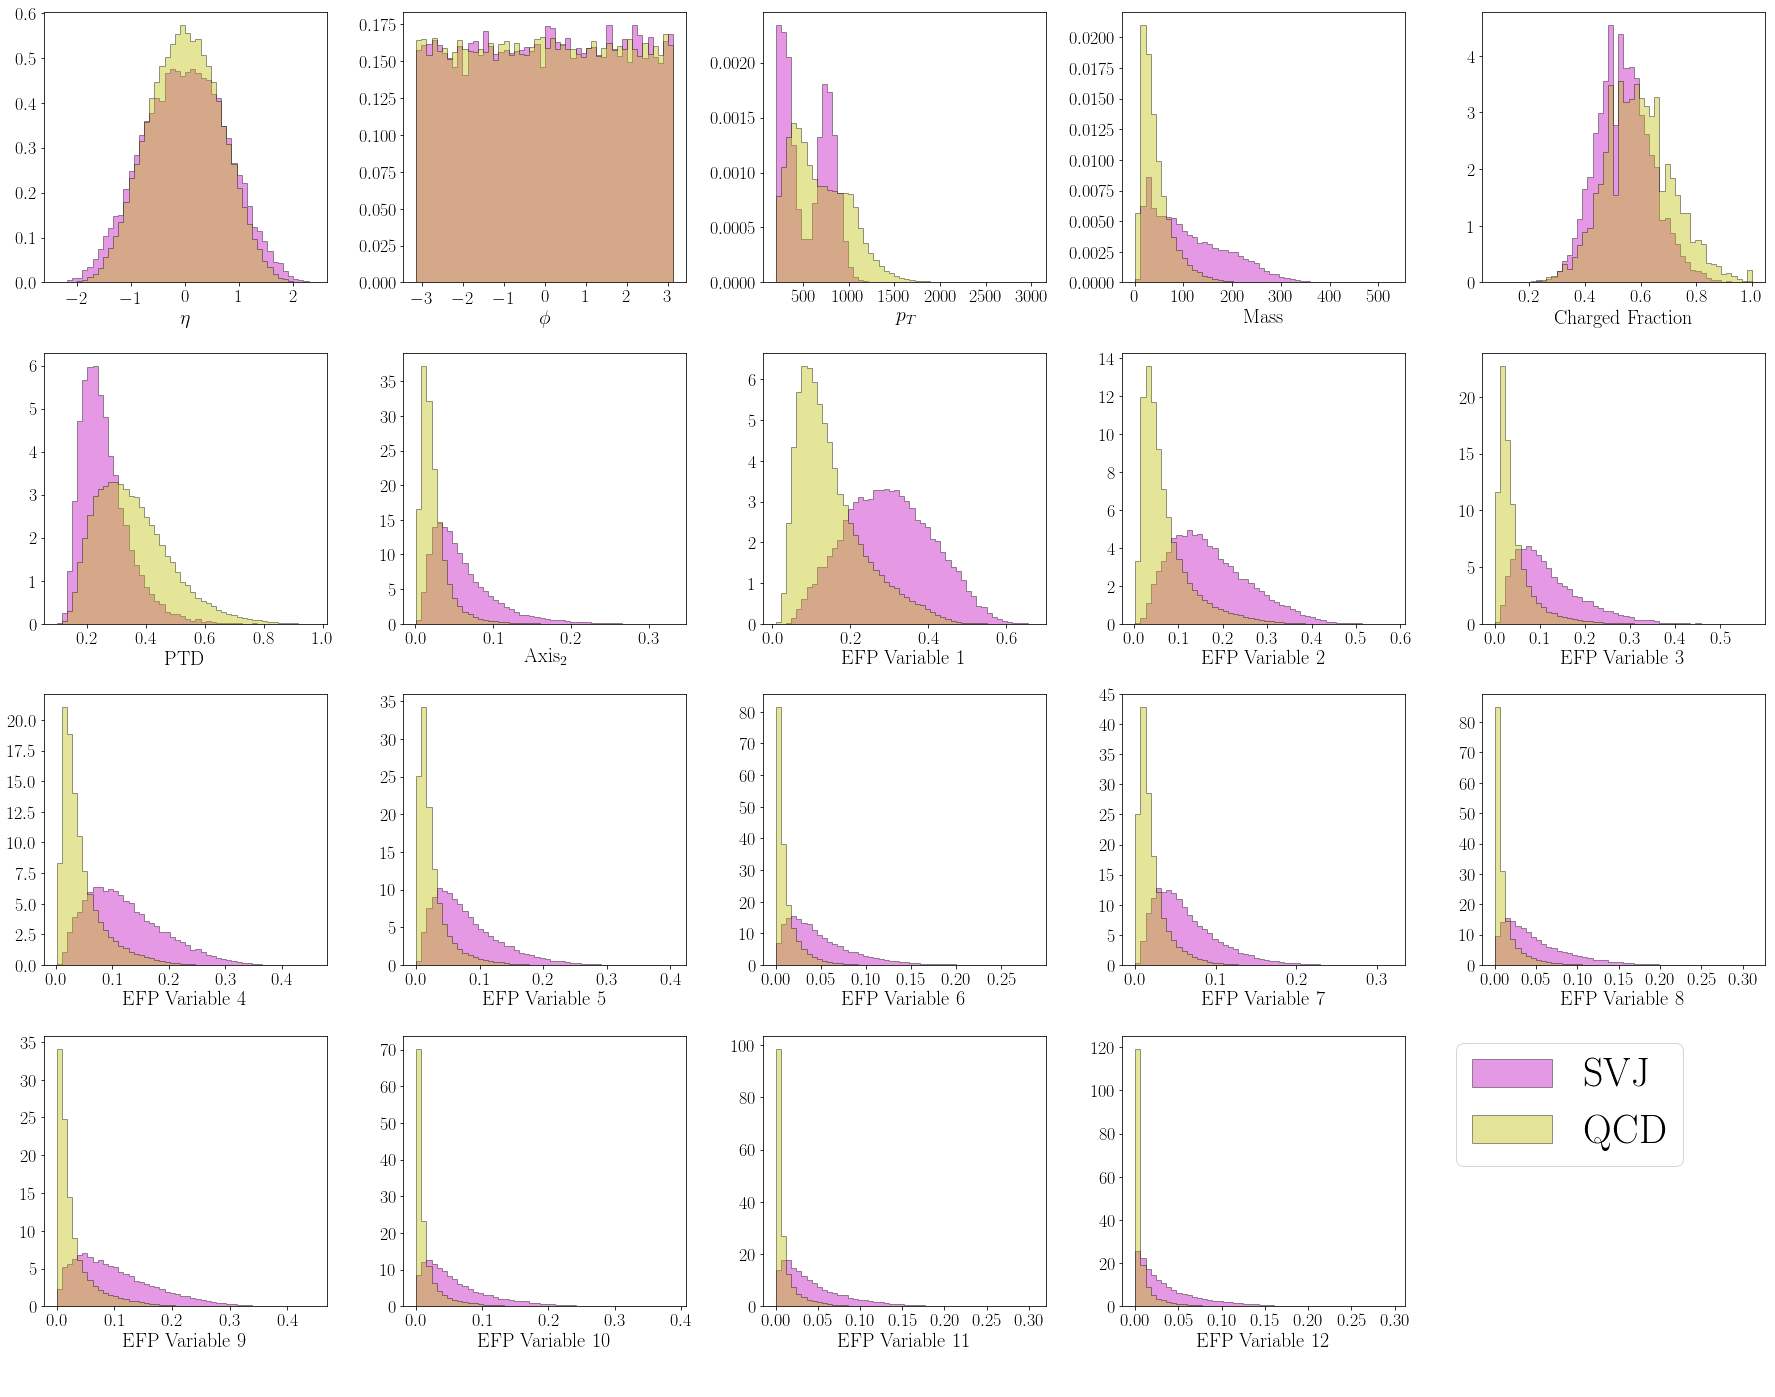

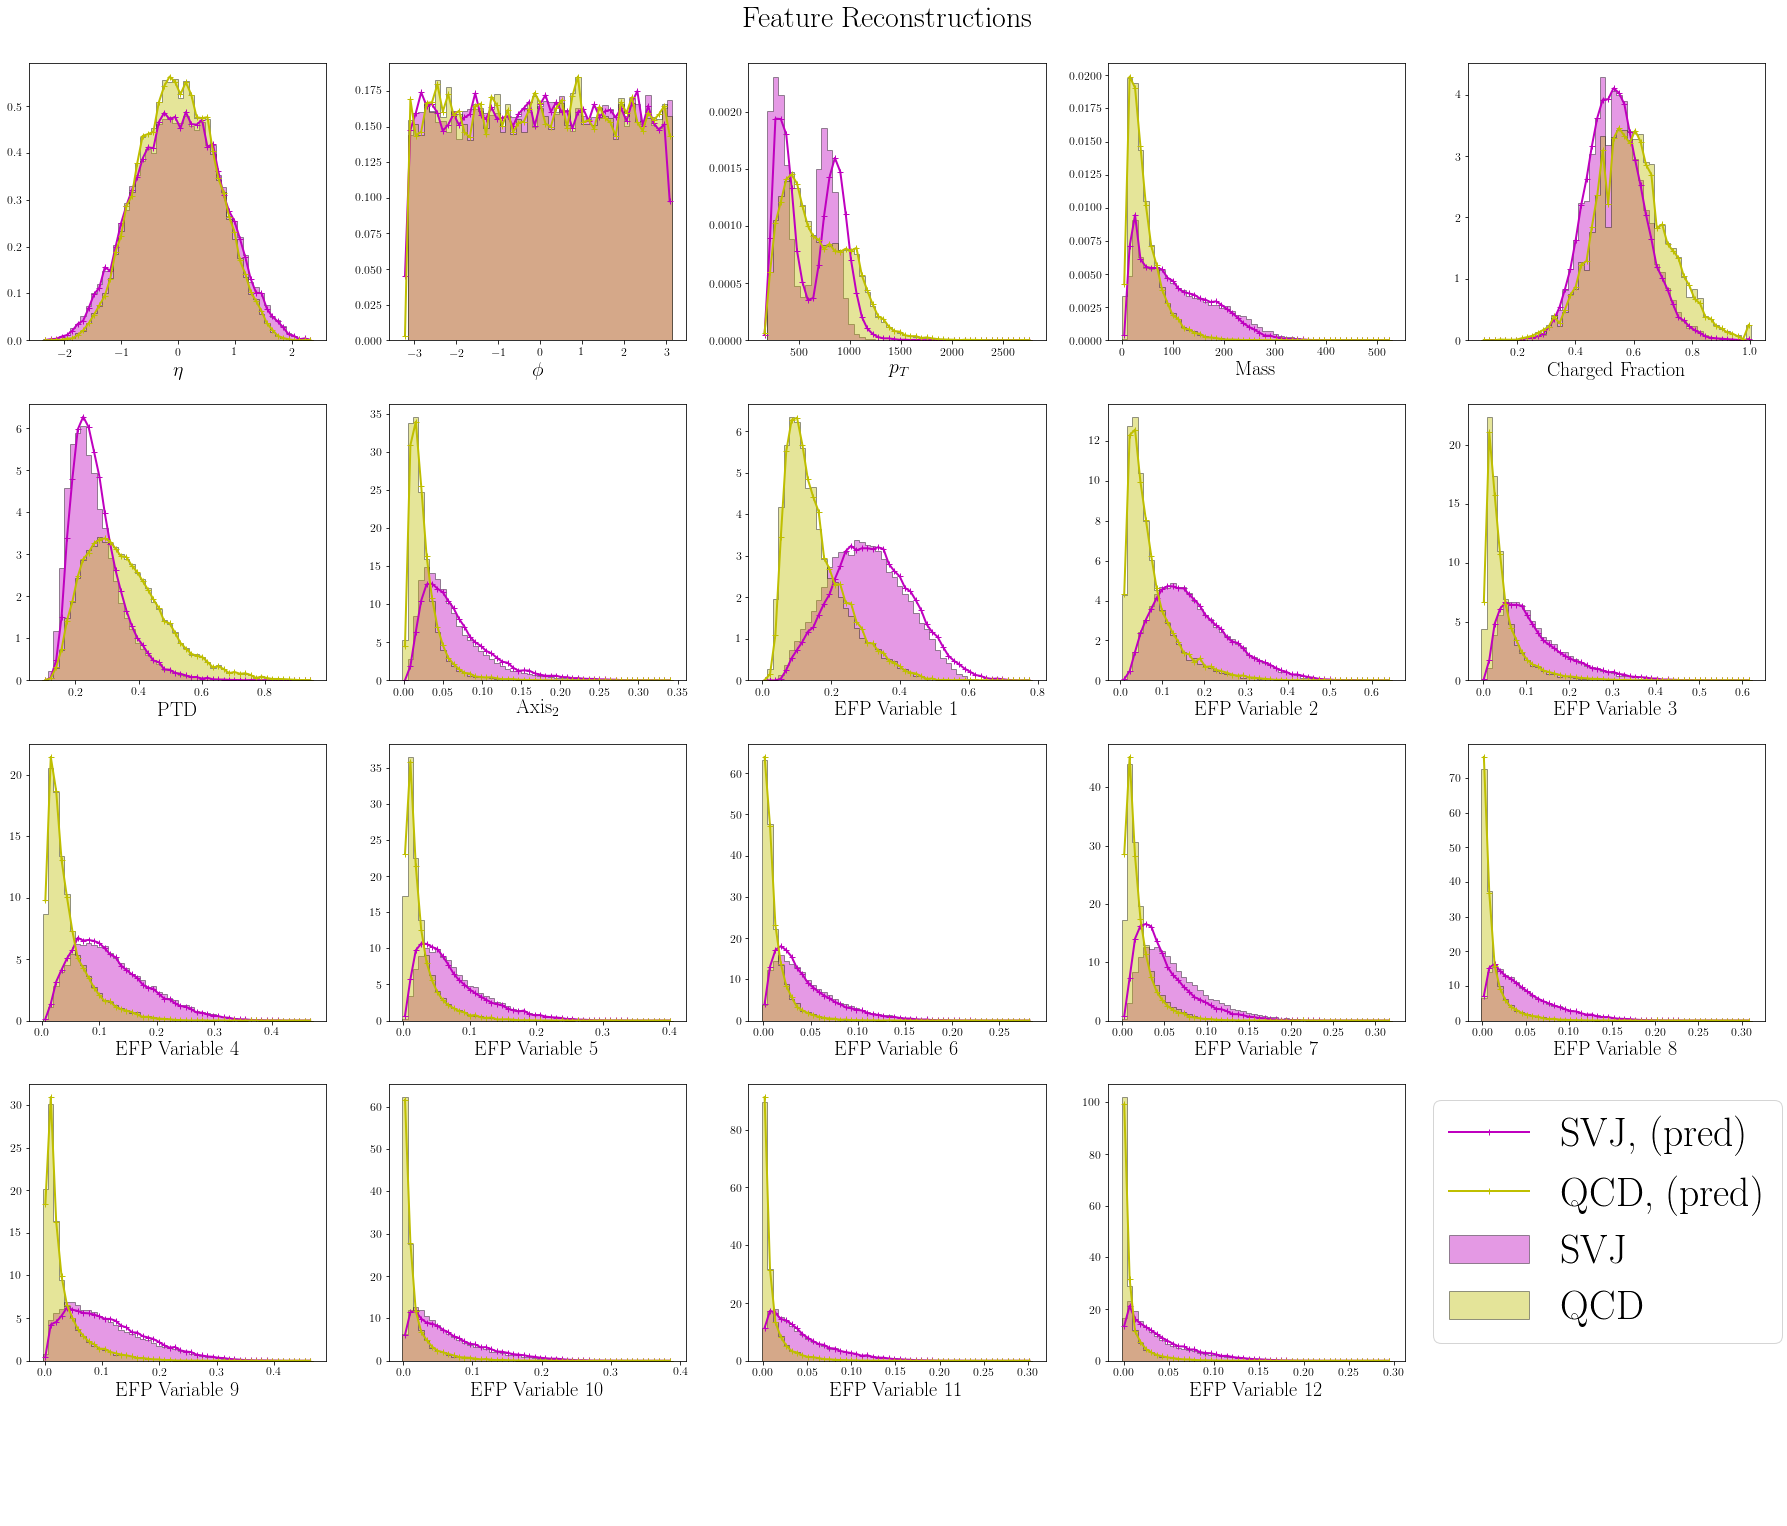

In [71]:
pre_all(e, normed=1)
post_all(e, ylog=0, normed=1)

In [96]:
dir(e)

['SVJ',
 'SVJ_err',
 'SVJ_err_jets',
 'SVJ_event',
 'SVJ_flavor',
 'SVJ_jets',
 'SVJ_norm',
 'SVJ_path',
 'SVJ_recon',
 'SVJ_reps',
 '__doc__',
 '__init__',
 '__module__',
 'ae',
 'all_names',
 'all_train',
 'check_cuts',
 'custom_objects',
 'cut_at_threshold',
 'd',
 'dists',
 'dists_dict',
 'eflow',
 'eflow_base',
 'error',
 'errs',
 'errs_dict',
 'errs_jet',
 'errs_jet_dict',
 'filename',
 'filepath',
 'fill_cuts',
 'flavors',
 'flavors_dict',
 'hlf',
 'hlf_to_drop',
 'input_dim',
 'instance',
 'metrics',
 'name',
 'node_reps',
 'norm_args',
 'norms',
 'norms_dict',
 'qcd',
 'qcd_err',
 'qcd_err_jets',
 'qcd_event',
 'qcd_flavor',
 'qcd_jets',
 'qcd_path',
 'qcd_recon',
 'qcd_reps',
 'recon',
 'recons',
 'recons_dict',
 'reps',
 'reps_dict',
 'retdict',
 'roc',
 'seed',
 'signals',
 'split_my_jets',
 'target_dim',
 'test',
 'test_flavor',
 'test_norm',
 'test_split',
 'train',
 'train_norm',
 'val',
 'val_norm',
 'val_split']

In [75]:
e.ae.layers[1].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (InputLayer)         (None, 19)                0         
_________________________________________________________________
layer_2 (Dense)              (None, 200)               4000      
_________________________________________________________________
layer_3 (Dense)              (None, 10)                2010      
Total params: 6,010
Trainable params: 6,010
Non-trainable params: 0
_________________________________________________________________


In [76]:
e.ae.layers[2].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_3 (InputLayer)         (None, 10)                0         
_________________________________________________________________
layer_4 (Dense)              (None, 200)               2200      
_________________________________________________________________
layer_5 (Dense)              (None, 19)                3819      
Total params: 6,019
Trainable params: 6,019
Non-trainable params: 0
_________________________________________________________________


In [21]:
def errors(e, bins=50, names="*", drop='mse', ylabel=None, normed=1, xlog=False, ylog=False, pileup=True, rng=None):
#     recon_kwd = '(Reconstructed)'
    data = plotdata(e.errs_dict, names=names, drop=drop)

    fs = 18
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['figure.autolayout'] = True
    plt.rcParams['xtick.labelsize']=fs
    plt.rcParams['ytick.labelsize']=fs
    matplotlib.rcParams.update({'font.size': 30})
    
#     rows, cols = (1,1)
    f, ax = plt.subplots(1, 1, figsize=(2*m1, 2*m2))
    
#     f.suptitle("Input Variables", y=1.02, fontsize=30)
    ogbins = bins
    
    for d,v in data.items():
        if 'bins' in var_styles[d]:
            bins = var_styles[d].pop('bins')
        else:
            bins = ogbins
            
        if 'range' in var_styles[d]:
            rng = var_styles[d].pop('range')
        elif rng is None:
            rng = map(lambda f: f(map(f, v.values())), [min, max])
        
        
#         keys = reversed(sorted([k for k in v.keys() if len(k.split()) == 1]) + sorted([k for k in v.keys() if len(k.split()) > 1]))
        for k in v.keys():
            
            datum = v[k]

            if pileup:
                datum[datum < rng[0]] = rng[0]
                datum[datum > rng[1]] = rng[1]
            nbins = bins
            if xlog:
                nbins = np.geomspace(rng[0], rng[1], bins)
                
            style = styles[k].copy()

#             style['alpha'] = 0.3
            ax.hist(datum, range=rng,bins=nbins, normed=normed, **style)
            
            var_style = var_styles[d].copy()
            if 'Variable' in var_style['xlabel']:
                var_style['xlabel'] = "EFP " + var_style['xlabel'] 
                
            ax.set_xlabel(**(var_style))
#             ax.set_yscale('log')
            if xlog:
                ax.set_xscale('log')
            if ylog:
                ax.set_yscale('log', nonposy='clip')
            if ylabel is not None:
                ax.set_ylabel(ylabel)
            
    
    handles,labels = ax.get_legend_handles_labels()
    plt.figlegend(handles, labels, loc=(.7,.80), fontsize=30)




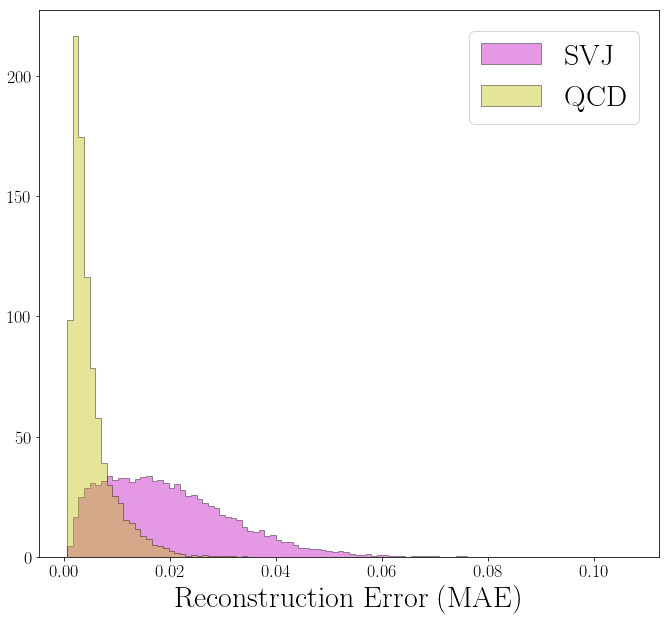

In [78]:
errors(e, ylog=0, normed=1, bins=100)

In [98]:
utils.get_cutflow_table("data/background/process/*cutflow*")

,cut_name,n_events,abs eff.,rel eff.
0,no cut,3462097,100.00,100.00
1,0 Passing Leptons,2954925,85.35,85.35
2,n Jets > 1,2954829,85.35,100.00
3,abs jet Etas < 2.4,2953953,85.32,99.97
4,abs DeltaEta < 1.5,2302470,66.51,77.95
5,MET/M_T > 0.15,226008,6.53,9.82
6,Jet PT > 200,217750,6.29,96.35
7,Dijet veto,217750,6.29,100.00
8,M_T > 1500,180610,5.22,82.94
9,MET/M_T > 0.25,51715,1.49,28.63


In [86]:
e.SVJ_err.shape, e.test.shape

((24740, 2), (15514, 19))

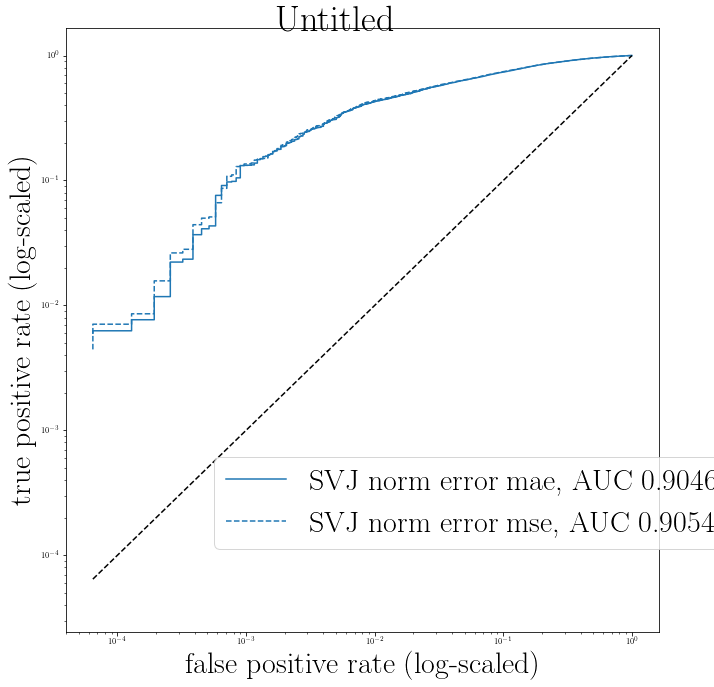

In [84]:
e.roc(figsize=10, yscale='log', xscale='log')

In [43]:
e.ae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (InputLayer)         (None, 17)                0         
_________________________________________________________________
encoder (Model)              (None, 16)                1966      
_________________________________________________________________
decoder (Model)              (None, 17)                1967      
Total params: 3,933
Trainable params: 3,933
Non-trainable params: 0
_________________________________________________________________


In [219]:
# pre_eflow(e, ylog=1, normed=1, pileup=1)
# pre_hlf(e, ylog=0, normed=1, pileup=1)


In [63]:
hist, bins, ax = data

In [82]:
unit

((50,), (51,))

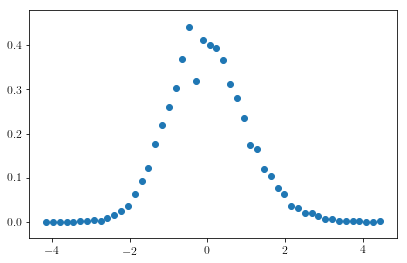

In [84]:
plt.scatter(bins[:-1] + np.diff(bins)/2., hist)

In [32]:
isinstance({}, odict)

False

In [26]:
data['Eta']

['ttbar', 'SVJ', 'qcd']

In [208]:
print axs.flatten()

KeyError: 0

data_table :: plotting distrubution(s) for table(s) ['qcd background', 'SVJ', 'ttbar']


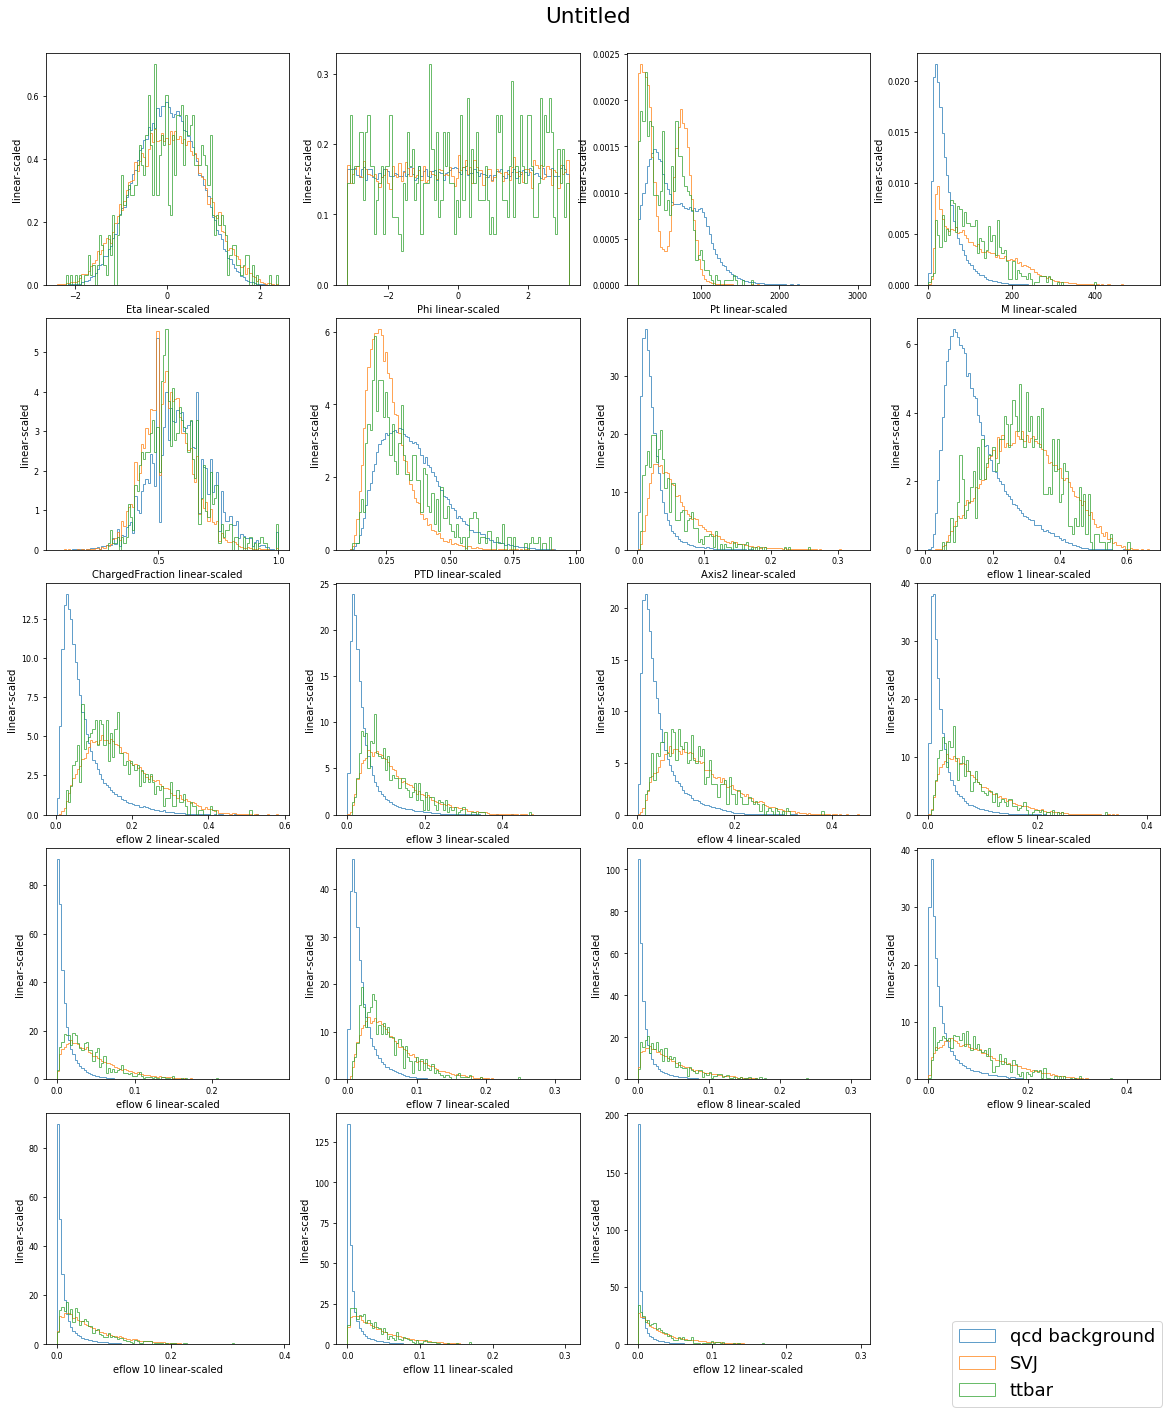

In [55]:
ew.qcd.plot([ew.SVJ, ew.ttbar], bins=100, normed=1)

In [60]:
ew.SVJ_event.plot(ew.ttbar_event, normed=1, hist)

In [71]:
for 

OrderedDict([('ttbar',           mse       mae
              0    0.003892  0.044841
              1    0.009147  0.075464
              2    0.006919  0.059267
              3    0.001369  0.022917
              4    0.023907  0.114984
              5    0.010713  0.072994
              6    0.040081  0.148212
              7    0.007383  0.064970
              8    0.000422  0.015077
              9    0.007196  0.063711
              10   0.001408  0.028113
              11   0.009828  0.075246
              12   0.004488  0.050683
              13   0.000865  0.021238
              14   0.017905  0.099629
              15   0.002185  0.034367
              16   0.005980  0.063795
              17   0.001031  0.023641
              18   0.005607  0.056181
              19   0.002335  0.035037
              20   0.036987  0.143074
              21   0.007042  0.064283
              22   0.000491  0.017651
              23   0.005896  0.055888
              24   0.000333  0.013410
   

In [105]:
import seaborn as sns

In [ ]:
def error_plot(e):
    to_plot = e.errs_dict
    
    

data_table :: plotting distrubution(s) for table(s) ['SVJ norm error', 'qcd test norm error']


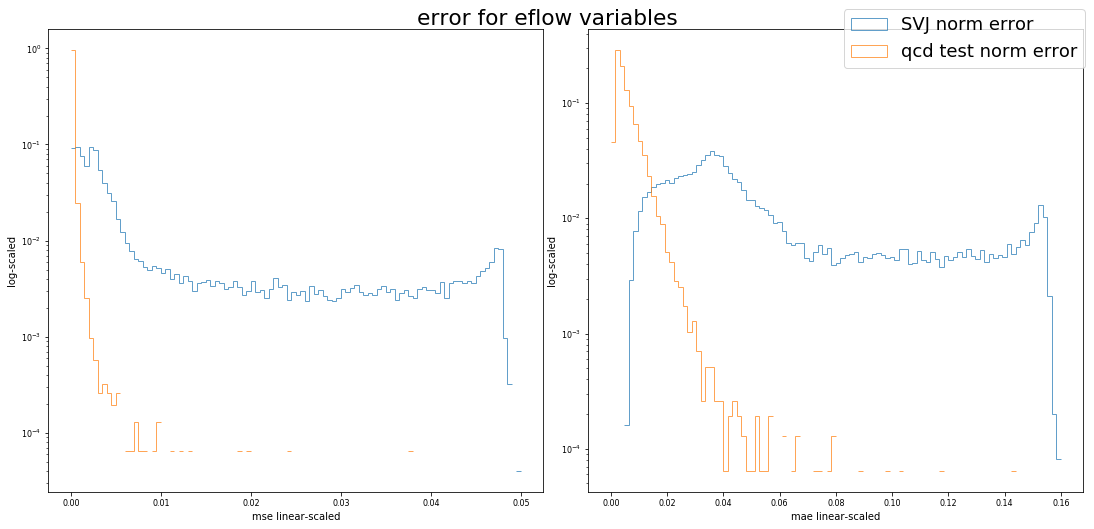

In [46]:
e.error(bins=100, yscale='linear', rng=((0.,0.05), (0.,0.16)))

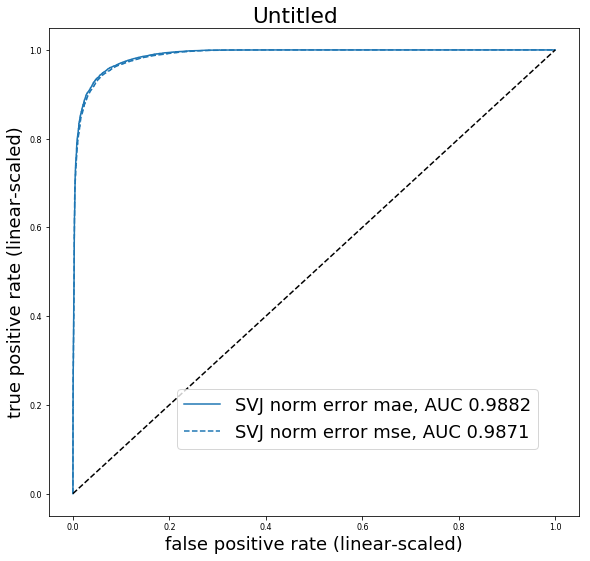

In [49]:
e.roc()

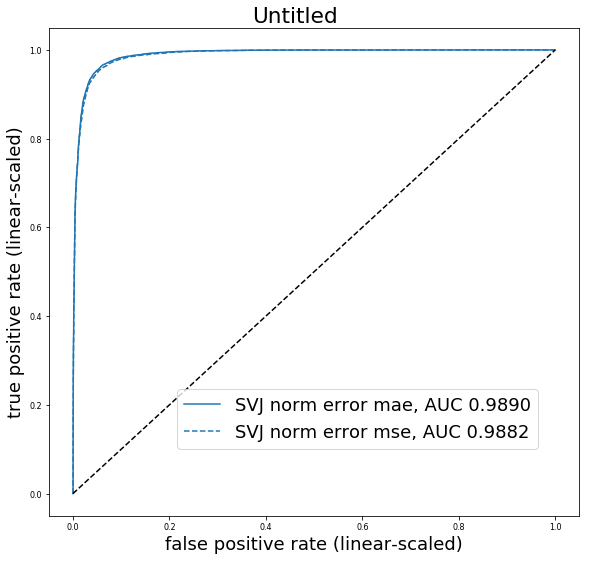

In [50]:
ew.roc()

In [104]:
e.error(
    bins=50, yscale='log', rng=((0.,0.05), (0.,0.08)),
    histtype='', figloc=(0.75, 0.8), fontsize=18,
)

data_table :: plotting distrubution(s) for table(s) ['SVJ norm error', 'qcd test norm error']


ValueError: histtype  is not recognized

In [50]:
import numpy as np
s = utils.summary()
nulls = s.hlf_to_drop[s.hlf_to_drop.isnull()]
for i,ni in enumerate(nulls.index):
    s.loc[ni, 'hlf_to_drop'] = [['Energy', 'Flavor']]
    #= np.asarray([['Energy', 'Flavor'] for i in range(len(s.hlf_to_drop.isnull()))])T

s.hlf_to_drop

ValueError: Must have equal len keys and value when setting with an ndarray

In [2]:
utils.data_table(utils.summary()).cfilter('filename')

,filename
0,eflow3_2_v6
1,eflow3_1_v11
2,eflow3_1_v12
3,eflow3_50_v0
4,eflow3_800_v0
5,hlf_eflow3_800_v0
6,hlf_eflow3_4_v0
7,hlf_eflow3_15_v3
8,hlf_eflow3_15_v4
9,hlf_eflow3_15_v5


In [4]:
e = ev.ae_evaluation("hlf_eflow3_5_v0")

found 1 matches with search '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/autoencode/data/summary/hlf_eflow3_5_v0.summary'
train_shell :: using saved model


data_table :: plotting distrubution(s) for table(s) ['SVJ norm', 'SVJ norm pred', 'qcd test norm', 'qcd test norm pred']


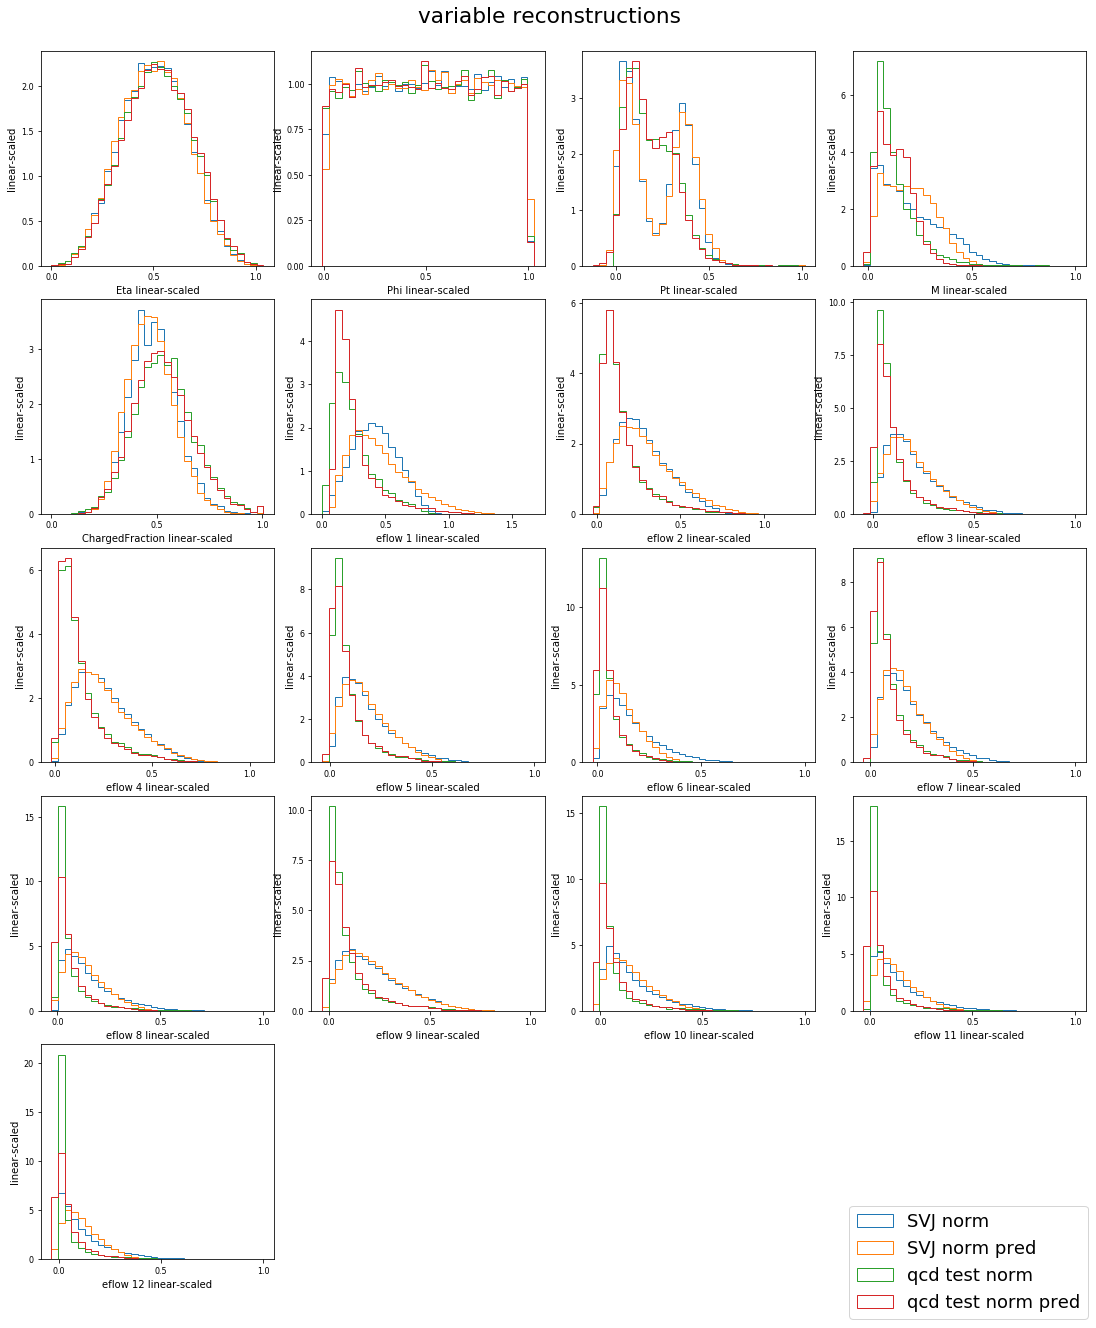

In [6]:
e.recon()

In [44]:
s  = utils.summary(include_outdated=1)
s.VID.fillna(0, inplace=True)

In [47]:
'VID' in s

True

In [105]:
data.qcd

<__main__.data_element instance at 0x7f4fff4eb518>

In [117]:
def trans(d):
    return d.cfilter(["eflow*"])
flav = utils.jet_flavor_split(to_split=trans(data.qcd.data), ref=data.qcd.flavor)
flav[0].plot(flav[1:],  bins=50, normed=1, cols=2)
# trans(data.qcd.data).plot(map(trans, [data.svj_norad.data, data.svj_old.data, data.ttbar.data]), normed=1, cols=3, bins=50)

data_table :: plotting distrubution(s) for table(s) ['down', 'up', 'strange', 'charm', 'bottom', 'gluon']


KeyboardInterrupt: 

In [116]:
data.qcd.data.plot([data.svj.data, data.ttbar.data], normed=1)

AttributeError: data_handler instance has no attribute 'svj'

In [141]:
import glob
import os

from collections import OrderedDict as odict

class data_element:
    def __init__(
        self,
        data,
        names,
        default='data',
    ):
        if not isinstance(names, (list,tuple,dict,set)):
            names = [names]
        if not isinstance(data, (list,tuple,dict,set)):
            data = [data]
            
        assert len(names) == len(data)
        
        self.size = len(names)
        self._obj_dict = odict()
        for name,datum in zip(names,data):
            setattr(self, name, datum)
            self._obj_dict[name] = getattr(self, name)

    def __iter__(
        self
    ):
        return iter(self._obj_dict)
            
    def __len__(
        self,
    ):
        return self.size
    

class data_handler:
    def __init__(
        self,
        hlf=True,
        eflow=True,
        hlf_to_drop=['Flavor', 'Energy'],
        **data_paths
    ):
        
        self._paths = set()
        self._names = set()
        for name,path in data_paths.items():
            self.add_path(name, path, hlf, eflow, hlf_to_drop)
            
    def add_path(
        self,
        name,
        path,
        hlf=1,
        eflow=1,
        hlf_to_drop=['Flavor', 'Energy']
    ):
        assert name not in self._names, "name '{}' is already in this object!! choose another".format(name)
        
        path = os.path.abspath(path)
        if not path.endswith('.h5'):
            path = os.path.join(path, '*.h5')
        
        assert path not in self._paths, "duplicate path being added! '{}' already in filelist".format(path)
        
        ret = utils.load_all_data(
            globstring=path,
            name=name, 
            include_hlf=hlf, 
            include_eflow=eflow,
            hlf_to_drop=hlf_to_drop,
        )
        
        elt = data_element(
            list(ret) + [utils.jet_flavor_split(to_split=ret[0], ref=ret[3])],
            ['data', 'jets', 'event', 'flavor', 'byflavor']
        )
        
        setattr(self, name + "_raw", ret)
        
        setattr(self, name, elt)
        
        self._paths.add(path)
        self._names.add(name)
        
        
#         setattr(self, name, ret[0])
#         setattr(self, name + "_jets", ret[1])
#         setattr(self, name + "_event", ret[2])
#         setattr(self, name + "_flavor", ret[3])


In [153]:
data = data_handler(
#     ttbar="data/ttbar_200pt/base_4/",
    qcd="data/background/base_4/",
    svj_old="data/signal/base_4/",
    svj_norad="data/signal_NoRadNoNu/base_4/",
    hlf_to_drop=['Energy', 'Flavor', 'Axis2', 'PTD']
)

data_table :: plotting distrubution(s) for table(s) ['down', 'up', 'strange', 'charm', 'bottom', 'gluon']


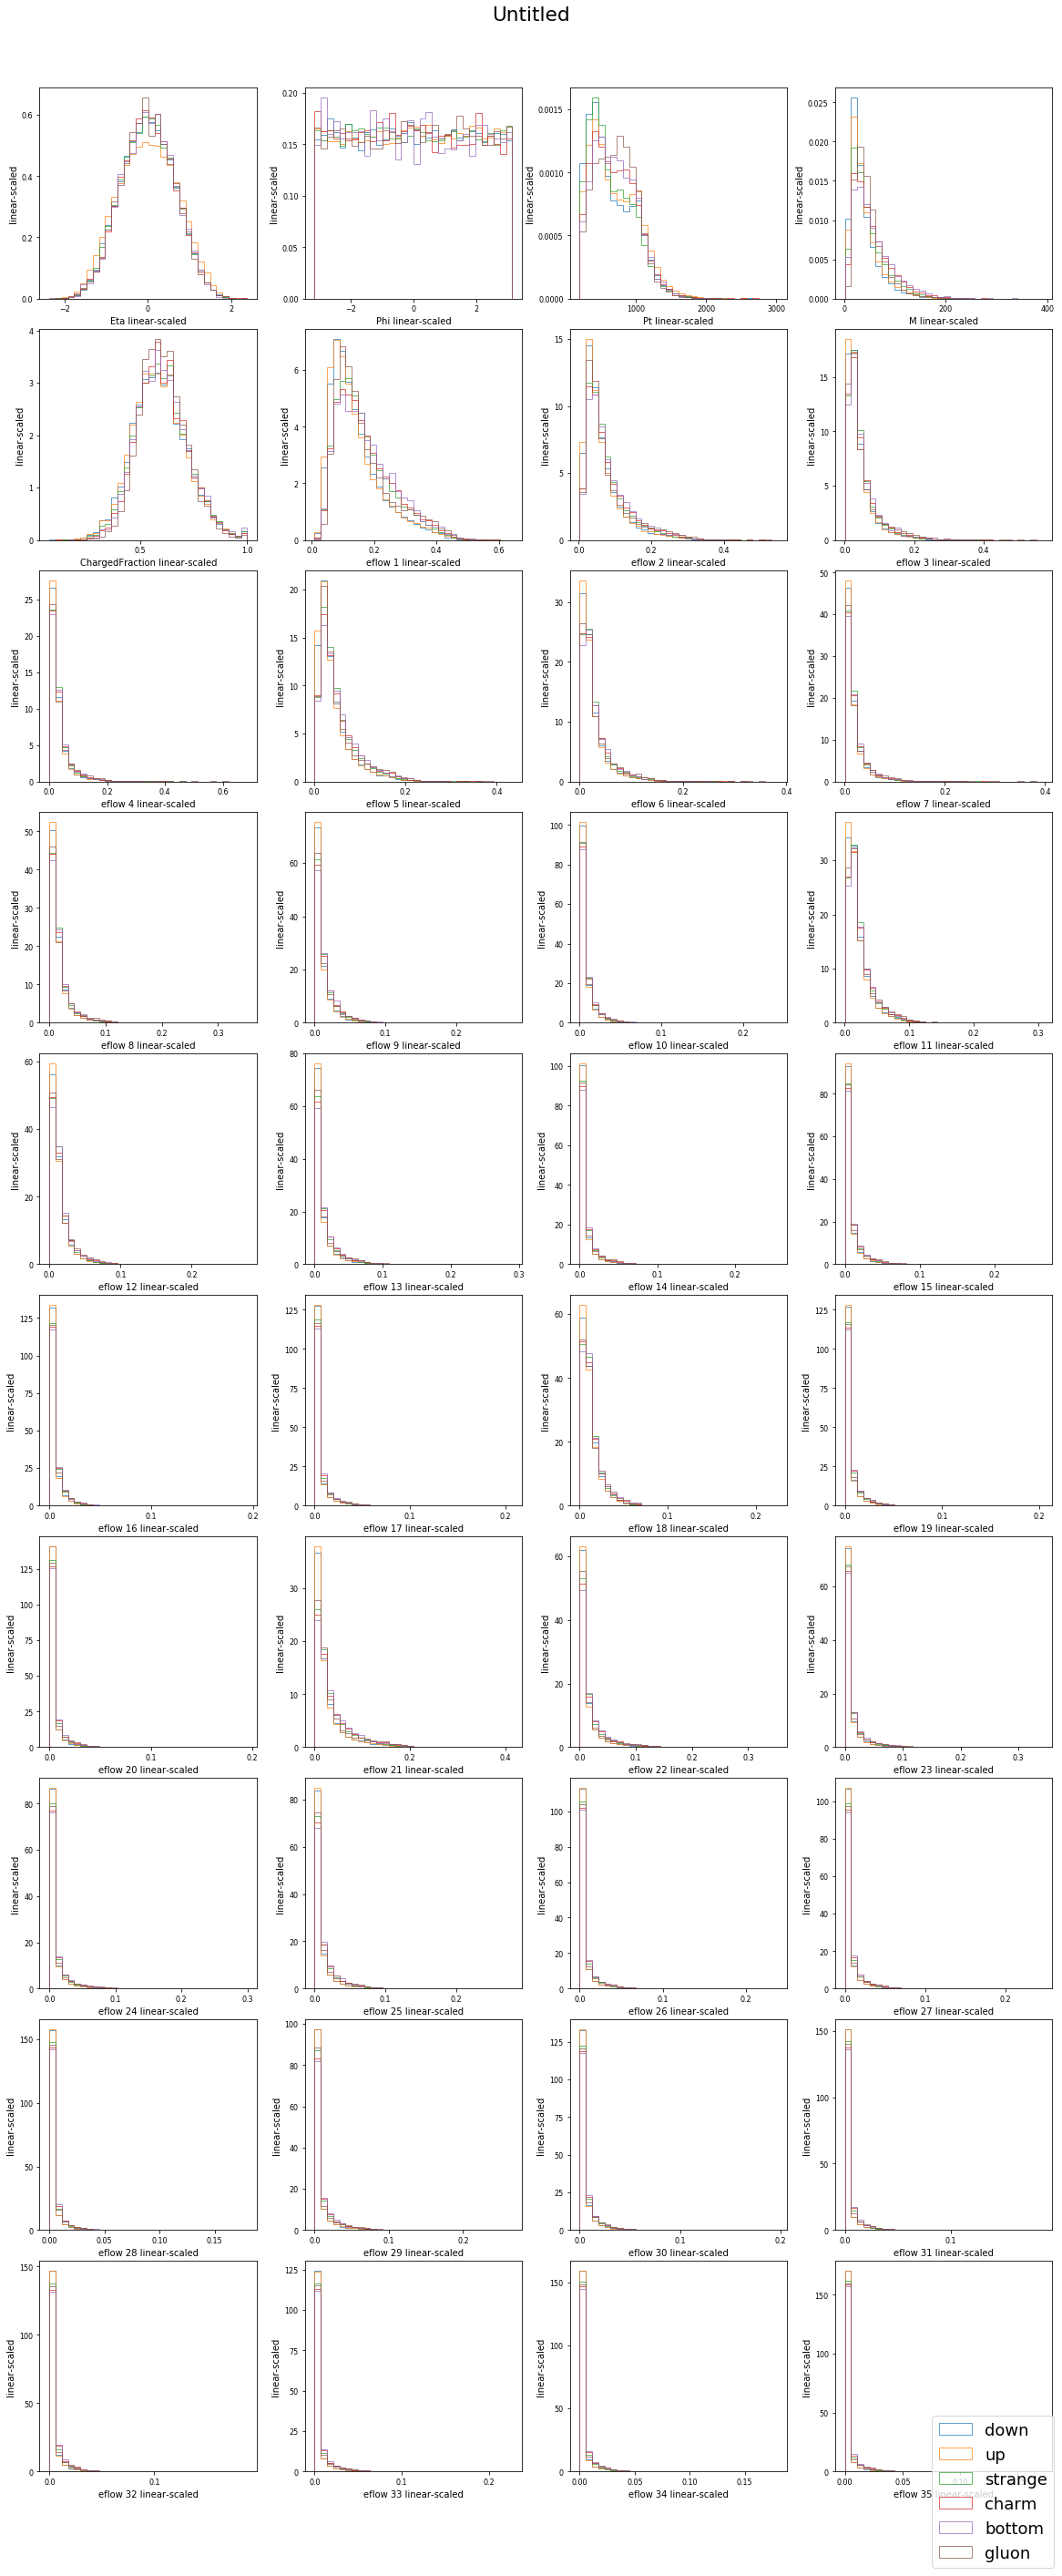

In [149]:
data.qcd.byflavor[0].plot(data.qcd.byflavor[1:], da, normed=1)